Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 10.2** | ARIMA Model
**Name** | Abad, Julia Marie Iberet
**Section** | CPE32S3
**Date Performed**: | May 2, 2024
**Date Submitted**: | May 4, 2024
**Instructor**: | Engr. Roman Richard



#Instructions:
1. Load time series data: data.csv <br>
2. Visualize the time series <br>
3. Fit an ARIMA Model (baseline model order = (1,1,1)) <br>
4. Improve the ARIMA Model <br>
5. Print the model summary <br>
6. Make a forecast (steps=10) <br>
7. Plot the forecast <br>
8. Perform a grid search <br>

In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

##Load time series data: data.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Assignment/data.csv'
data = pd.read_csv(file_path)
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.index = data.index.to_period('M')

In [ ]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

##Visualize the time series

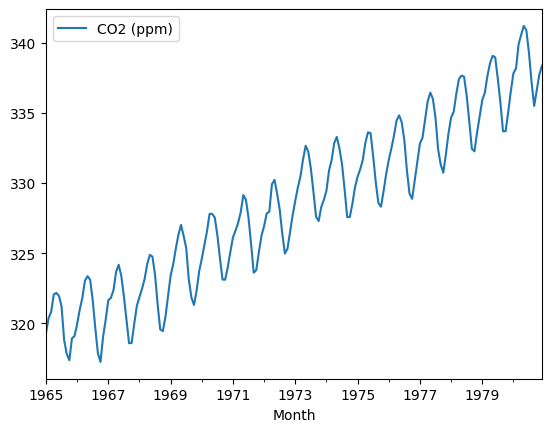

In [ ]:
data.plot()
plt.show()

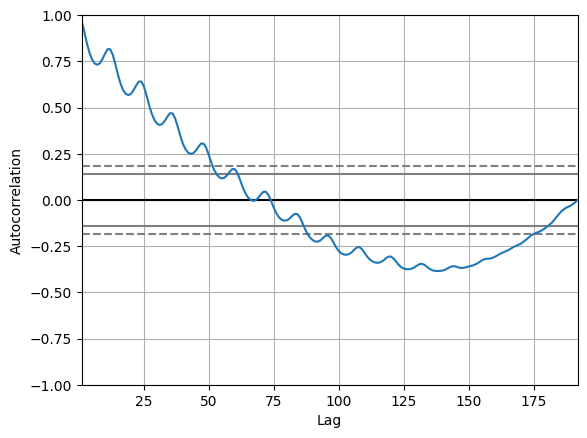

In [ ]:
autocorrelation_plot(data)
plt.show()

###Analysis
The first plot shows an increasing trend over time. This upward trend suggests a general pattern of growth or increase in the variable being measured across the monthly time intervals captured in the dataset.

The initial decreasing trend in autocorrelation followed by an increase around specific lag values suggests a potential seasonal or periodic pattern in the data. The rise in autocorrelation at certain lags indicates that there might be recurring patterns or cycles in the data that occur at those intervals.


##Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
model = ARIMA(data['CO2 (ppm)'], order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Sat, 04 May 2024   AIC                            457.638
Time:                        12:41:43   BIC                            467.395
Sample:                    01-31-1965   HQIC                           461.590
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

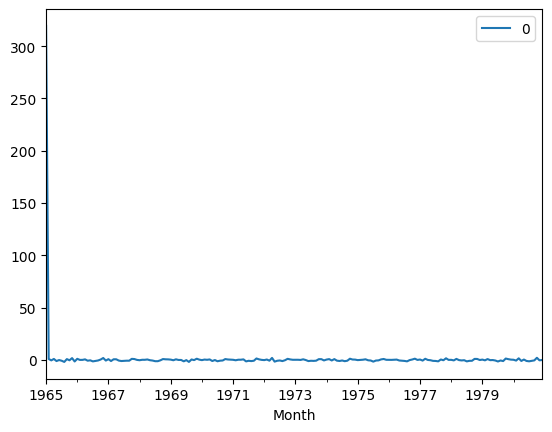

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

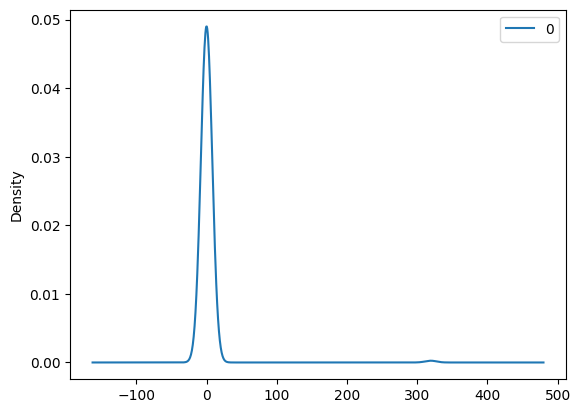

In [ ]:
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
print(residuals.describe())

                0
count  192.000000
mean     1.698162
std     23.055889
min     -1.760398
25%     -0.571139
50%      0.034938
75%      0.566208
max    319.320000


###Analysis

Analyzing the residuals plot, we observe that the residuals exhibit a pattern of dropping and plateauing from 1965 to 1979. This pattern suggests that the model captures the underlying trend in the data, as the residuals show a consistent behavior over this period.



##Make a forecast (steps=10)

In [ ]:
X = data['CO2 (ppm)'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

In [ ]:
for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=10)
    predictions.append(output[-1])
    obs = test[t]
    history.append(obs)
    print(f"Predicted: {output[-1]}, Expected: {obs}")

Predicted: 333.1901569375909, Expected: 331.9
Predicted: 328.8415134972784, Expected: 330.05
Predicted: 327.41502383416025, Expected: 328.58
Predicted: 326.5023009951728, Expected: 328.31
Predicted: 328.43114456051353, Expected: 329.41
Predicted: 331.4982937337682, Expected: 330.63
Predicted: 332.3234158985235, Expected: 331.63
Predicted: 333.04014670656136, Expected: 332.46
Predicted: 333.63872390283177, Expected: 333.36
Predicted: 334.76588207265996, Expected: 334.45
Predicted: 336.1808633871618, Expected: 334.82
Predicted: 334.99904492951174, Expected: 334.32
Predicted: 333.271601678779, Expected: 333.05
Predicted: 330.8537042689243, Expected: 330.87
Predicted: 327.0888817235332, Expected: 329.24
Predicted: 327.1005438849225, Expected: 328.87
Predicted: 328.81541243710143, Expected: 330.18
Predicted: 332.85064725151585, Expected: 331.5
Predicted: 333.26493952524817, Expected: 332.81
Predicted: 334.90624904410106, Expected: 333.23
Predicted: 333.38553148888764, Expected: 334.55
Predi

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.412


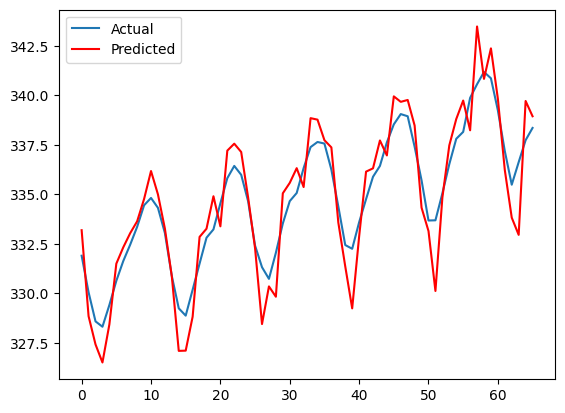

In [ ]:
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

###Analysis
The output shows the predicted values alongside the actual observed values, demonstrating the model's performance in forecasting CO2 levels. The predictions generally align well with the actual values, as seen in the plotted graph where the red line closely follows the blue line. However, there are instances where the model slightly underestimates or overestimates the actual values, resulting in some deviations between the predicted and observed values.


##Plot the forecast

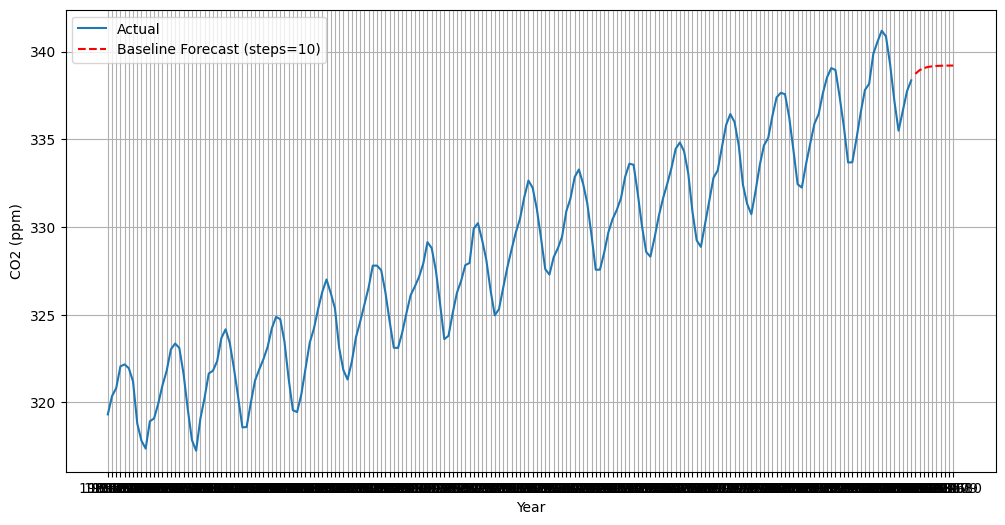

In [ ]:
forecast_baseline = model_baseline_fit.forecast(steps=10)
forecast_index = pd.date_range(start=data.index[-1].to_timestamp(), periods=11, freq='M')[1:].strftime('%Y-%m')
plt.figure(figsize=(12, 6))
plt.plot(data.index.astype(str), data['CO2 (ppm)'], label='Actual')
plt.plot(forecast_index, forecast_baseline, color='red', linestyle='--', label='Baseline Forecast (steps=10)')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

##Improve the ARIMA Model

In [ ]:
model_improved = ARIMA(data['CO2 (ppm)'], order=(10, 2, 2))
model_improved_fit = model_improved.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model_improved_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                ARIMA(10, 2, 2)   Log Likelihood                 -86.154
Date:                Sat, 04 May 2024   AIC                            198.308
Time:                        12:44:24   BIC                            240.519
Sample:                    01-31-1965   HQIC                           215.407
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0475      0.111     -0.430      0.668      -0.264       0.169
ar.L2         -0.3964      0.061     -6.512      0.000      -0.516      -0.277
ar.L3         -0.4955      0.053     -9.415      0.0

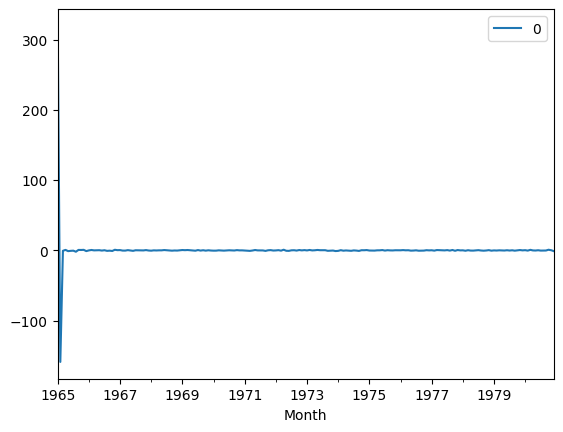

In [ ]:
residuals_improved = pd.DataFrame(model_improved_fit.resid)
residuals_improved.plot()
plt.show()

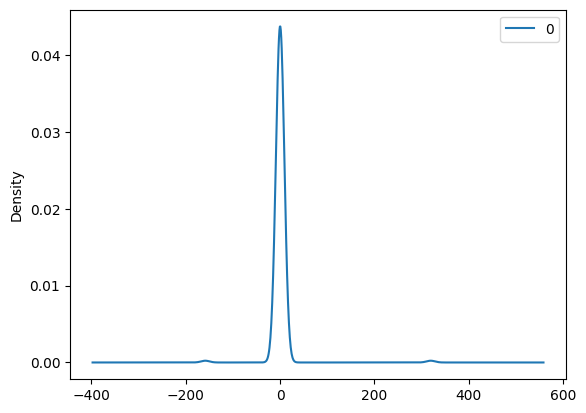

                0
count  192.000000
mean     0.836557
std     25.788415
min   -158.620050
25%     -0.269194
50%      0.027955
75%      0.282585
max    319.320000


In [ ]:
residuals_improved.plot(kind='kde')
plt.show()
print(residuals_improved.describe())

###Analysis
The ARIMA(10, 2, 2) model shows improvements over the baseline in terms of AIC/BIC scores, suggesting better model fit and predictive power. However, the presence of outliers in the residual plots and the relatively high standard deviation of residuals indicate areas where the model could be further refined to enhance its accuracy and stability.


##Perform a grid search

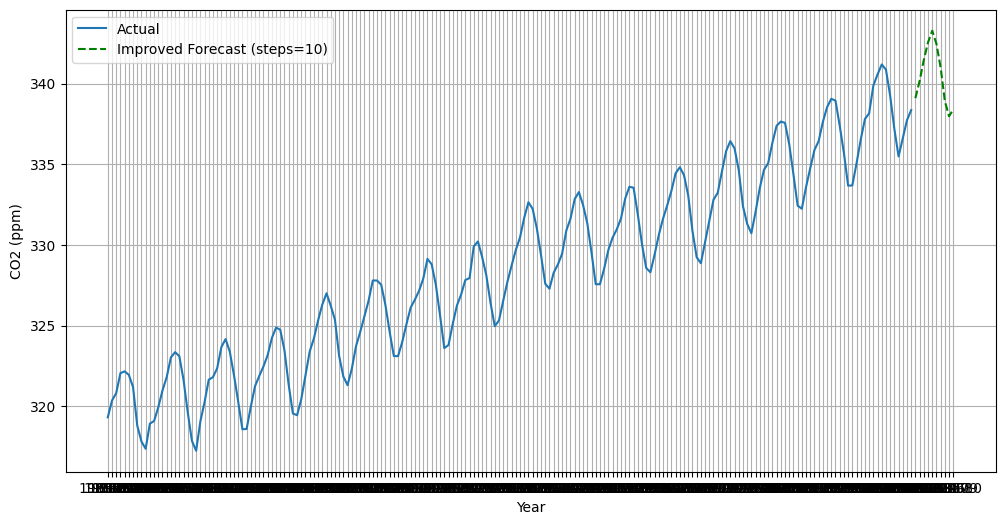

In [ ]:
forecast_improved = model_improved_fit.forecast(steps=10)
forecast_index = pd.date_range(start=data.index[-1].to_timestamp(), periods=11, freq='M').to_period('M')[1:].strftime('%Y-%m')

plt.figure(figsize=(12, 6))
plt.plot(data.index.astype(str), data['CO2 (ppm)'], label='Actual')
plt.plot(forecast_index, forecast_improved, color='green', linestyle='--', label='Improved Forecast (steps=10)')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def evaluate_arima_model(data, arima_order):
    train_size = int(len(data) * 0.75)
    train_data, test_data = data[0:train_size], data[train_size:]

    start = len(train_data)
    end = len(train_data) + len(test_data) - 1

    model = ARIMA(train_data, order=arima_order)
    results = model.fit()
    forecast = results.predict(len(data), len(data) + 10, typ='levels')
    predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
    mse = mean_squared_error(test_data, predictions)
    return mse

In [ ]:
def evaluate_models(data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order, mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = range(0, 11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.202
ARIMA(0, 3, 2) MSE=945.046
ARIMA(0, 3, 3) MSE=1022.564
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.276
ARIMA(1, 3, 0) MSE=75818.720
ARIMA(1, 3, 1) MSE=1087.554
ARIMA(1, 3, 2) MSE=1026.069
ARIMA(1, 3, 3) MSE=1016.446
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.911
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

###Analysis

Some models like ARIMA(1, 1, 0), ARIMA(1, 2, 2), and ARIMA(2, 1, 2) show relatively low MSE values, indicating better performance compared to others.  The best-performing model is identified as ARIMA(8, 3, 3) with an MSE of 0.790. This model demonstrates a significant improvement in accuracy compared to other models evaluated.

#Supplementary

In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import warnings

##Load time series data: dataset_temperature.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Assignment/dataset_temperature.csv'
supple = pd.read_csv(file_path, skiprows=1)
supple.columns = ['Month', 'Mean monthly temperature']
supple['Month'] = pd.to_datetime(supple['Month'], errors='coerce')
supple['Mean monthly temperature'] = pd.to_numeric(supple['Mean monthly temperature'], errors='coerce')

In [ ]:
supple.dropna(subset=['Month', 'Mean monthly temperature'], inplace=True)

In [ ]:
supple.set_index('Month', inplace=True)
supple = supple.resample('M').mean()

###Analysis

The dataset is a time series dataset representing monthly mean temperatures over a period of time. Data cleaning has been done.  Resampling the data to monthly frequency and taking the mean temperature for each month suggests that the dataset is now organized in a structured time series format suitable for further analysis.

##Visualize the time series

<Axes: xlabel='Month'>

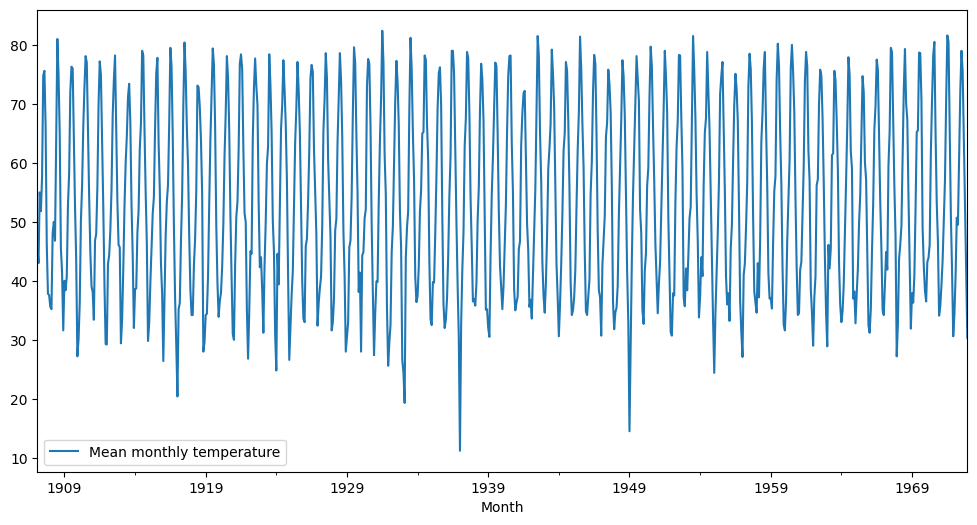

In [ ]:
supple.plot(figsize=(12,6))

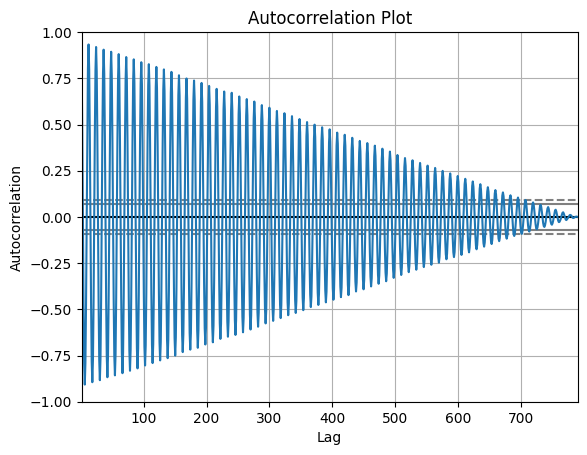

In [ ]:
autocorrelation_plot(supple['Mean monthly temperature'])
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

###Analysis
The plot of the mean monthly temperatures over time shows a fluctuating pattern with some noticeable seasonal variations. There seem to be periods of relatively higher temperatures followed by periods of lower temperatures, indicating potential seasonal cycles or patterns. Additionally, there are no apparent outliers or drastic shifts in the temperature data, suggesting a relatively stable temperature trend over the observed period.

##Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
model = ARIMA(supple['Mean monthly temperature'], order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  791
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2769.072
Date:                      Sat, 04 May 2024   AIC                           5544.143
Time:                              14:27:10   BIC                           5558.159
Sample:                          02-28-1907   HQIC                          5549.531
                               - 12-31-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5440      0.060      9.051      0.000       0.426       0.662
ma.L1         -0.0302      0.072     -0.418      0.676      -0.172       0.111
sigm

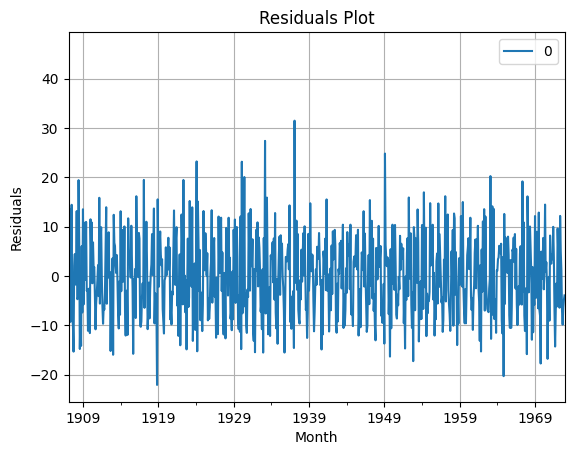

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals Plot')
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

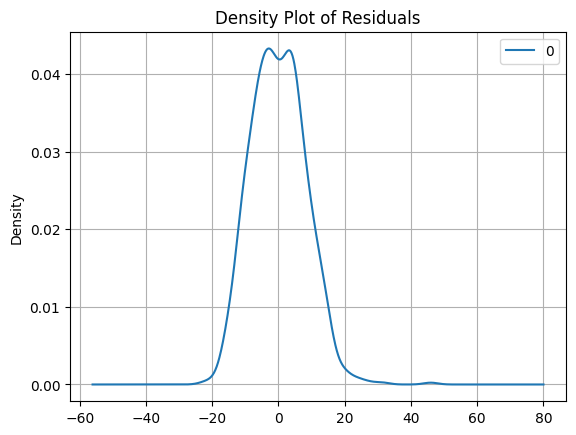

In [ ]:
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.grid(True)
plt.show()

In [ ]:
print(residuals.describe())

                0
count  791.000000
mean     0.041915
std      8.217461
min    -22.086833
25%     -5.921285
50%     -0.204399
75%      5.362657
max     46.000000


###Analysis

Analyzing the residuals plot, we see that the residuals appear to fluctuate around the zero line without any clear pattern, indicating that the model has captured most of the systematic information in the data. The density plot of residuals shows a bell-shaped curve, suggesting that while the residuals may not be perfectly normally distributed, they approximate a normal distribution reasonably well.

##Make a forecast (steps=10)

In [ ]:
X = supple['Mean monthly temperature'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

In [ ]:
for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=10)
    predictions.append(output[-1])
    obs = test[t]
    history.append(obs)
    print(f"Predicted: {output[-1]}, Expected: {obs}")

Predicted: 89.3670709112829, Expected: 76.4
Predicted: 73.03533851985495, Expected: 66.2
Predicted: 54.92365986410427, Expected: 57.1
Predicted: 46.809519307517405, Expected: 46.3
Predicted: 34.08757283020455, Expected: 40.4
Predicted: 33.562481359096765, Expected: 34.5
Predicted: 27.780179553491656, Expected: 39.5
Predicted: 44.8534593546988, Expected: 43.2
Predicted: 47.41792578989739, Expected: 51.7
Predicted: 61.21584390614988, Expected: 60.7
Predicted: 70.93392389861741, Expected: 69.0
Predicted: 78.50613887729554, Expected: 79.0
Predicted: 90.43978840137486, Expected: 74.7
Predicted: 70.216063595687, Expected: 68.6
Predicted: 61.72463408429807, Expected: 50.7
Predicted: 30.523455033969444, Expected: 41.3
Predicted: 30.30407281081158, Expected: 31.3
Predicted: 19.773213142447656, Expected: 30.7
Predicted: 29.740268715936054, Expected: 37.9
Predicted: 45.91706420339239, Expected: 37.5
Predicted: 37.24439386113649, Expected: 53.3
Predicted: 70.94507813540784, Expected: 62.7
Predicte

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9.700


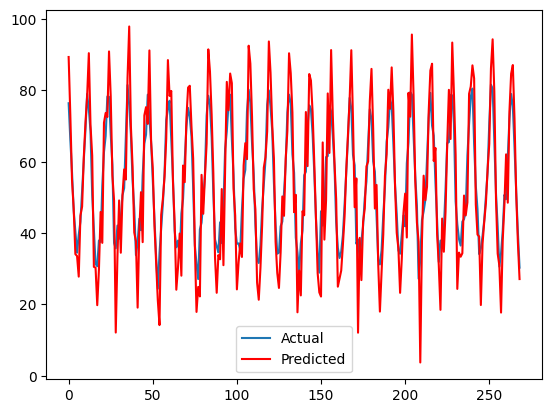

In [ ]:
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

###Analysis

Visually, plotting the actual temperatures against the predicted values shows that the model generally follows the same patterns as the actual data but may lag or lead slightly in capturing the exact peaks and troughs. The red line representing the predicted values aligns well with the actual data but exhibits some minor discrepancies, particularly during periods of rapid temperature changes.

The ARIMA model demonstrates its capability to forecast mean monthly temperatures with reasonable accuracy, capturing the underlying patterns and seasonal variations in the data.


##Plot the forecast

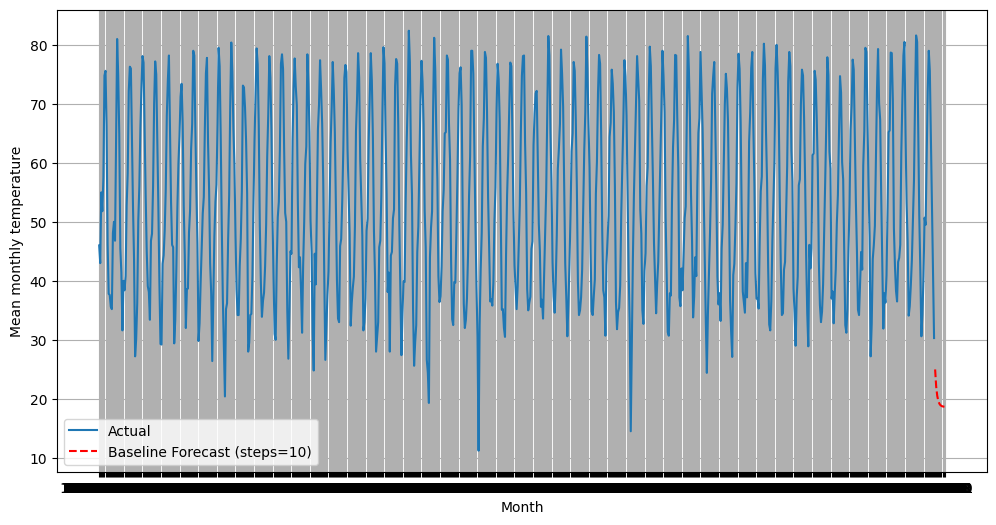

In [ ]:
forecast_baseline = model_fit.forecast(steps=10)
forecast_index = pd.date_range(start=supple.index[-1], periods=11, freq='M')[1:].strftime('%Y-%m')
plt.figure(figsize=(12, 6))
plt.plot(supple.index.astype(str), supple['Mean monthly temperature'], label='Actual')
plt.plot(forecast_index, forecast_baseline, color='red', linestyle='--', label='Baseline Forecast (steps=10)')
plt.xlabel('Month')
plt.ylabel('Mean monthly temperature')
plt.legend()
plt.grid(True)
plt.show()

##Improve the ARIMA Model

In [ ]:
model_improved = ARIMA(supple['Mean monthly temperature'], order=(10, 2, 2))
model_improved_fit = model_improved.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model_improved_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  791
Model:                      ARIMA(10, 2, 2)   Log Likelihood               -2292.209
Date:                      Sat, 04 May 2024   AIC                           4610.417
Time:                              14:33:45   BIC                           4671.137
Sample:                          02-28-1907   HQIC                          4633.759
                               - 12-31-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1825      0.062     -2.947      0.003      -0.304      -0.061
ar.L2         -0.3544      0.033    -10.633      0.000      -0.420      -0.289
ar.L

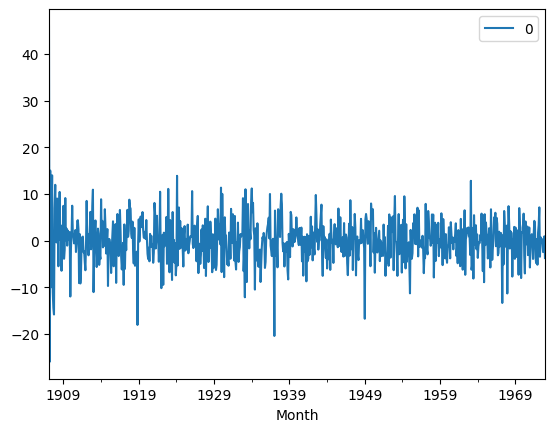

In [ ]:
residuals_improved = pd.DataFrame(model_improved_fit.resid)
residuals_improved.plot()
plt.show()

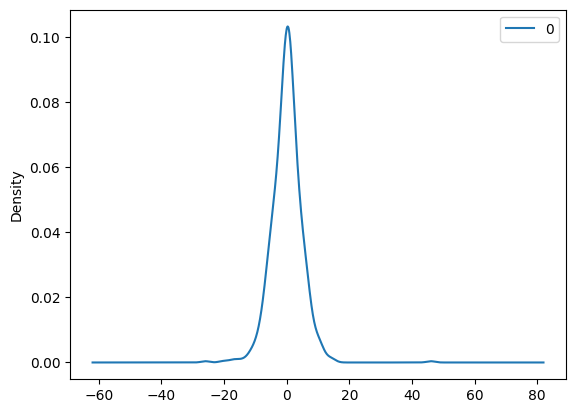

                0
count  791.000000
mean     0.051456
std      4.894065
min    -26.000283
25%     -2.523478
50%      0.205619
75%      2.719999
max     46.000000


In [ ]:
residuals_improved.plot(kind='kde')
plt.show()
print(residuals_improved.describe())

###Analysis
Analyzing the residuals, the time series plot shows no discernible pattern, indicating that the model has captured most of the underlying structure in the data. The residual plot's KDE curve shows a nearly normal distribution centered around the mean residual value of approximately 0.05. The standard deviation of the residuals is 4.89, with a range from -26 to 46. This suggests that while the model has improved significantly, there are still some outliers or unusual observations that the model doesn't account for perfectly, leading to occasional larger residuals.

##Perform a grid search

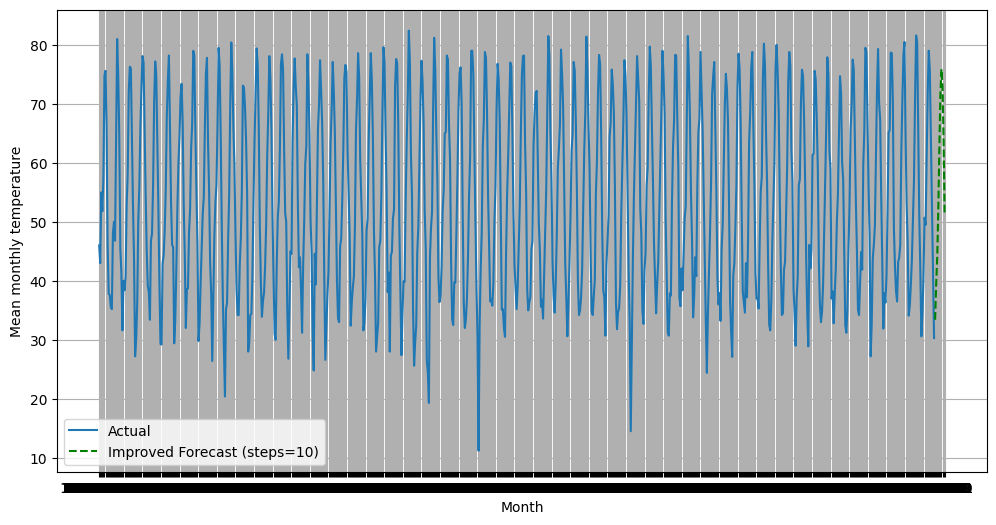

In [ ]:
forecast_improved = model_improved_fit.forecast(steps=10)
forecast_index = pd.date_range(start=supple.index[-1], periods=11, freq='M').to_period('M')[1:].strftime('%Y-%m')

plt.figure(figsize=(12, 6))
plt.plot(supple.index.astype(str), supple['Mean monthly temperature'], label='Actual')
plt.plot(forecast_index, forecast_improved, color='green', linestyle='--', label='Improved Forecast (steps=10)')
plt.xlabel('Month')
plt.ylabel('Mean monthly temperature')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def evaluate_models(supple, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            mse = evaluate_arima_model(supple, order)
            if mse < best_score:
                best_score, best_cfg = mse, order
            print(f'ARIMA{order} MSE={mse}')
        except:
            continue
    print(f'Best ARIMA{best_cfg} MSE={best_score}')

In [ ]:
def evaluate_arima_model(supple, order):
    dataset = supple['Mean monthly temperature'].values
    train_size = int(len(dataset) * 0.66)
    train, test = dataset[0:train_size], dataset[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error

In [ ]:
p_values = range(0, 11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(supple, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=242.36639007848746
ARIMA(0, 0, 1) MSE=104.38700512021286
ARIMA(0, 0, 2) MSE=68.97251765218554
ARIMA(0, 0, 3) MSE=54.05701731448158
ARIMA(0, 1, 0) MSE=86.26438661710037
ARIMA(0, 1, 1) MSE=68.6834995141864
ARIMA(0, 1, 2) MSE=61.94347773939648
ARIMA(0, 1, 3) MSE=68.96608378904202
ARIMA(0, 2, 0) MSE=81.157249070619
ARIMA(0, 2, 1) MSE=76.4337518002373
ARIMA(0, 2, 2) MSE=74.83801981002304
ARIMA(0, 2, 3) MSE=62.04388516718804
ARIMA(0, 3, 0) MSE=205.34412639405193
ARIMA(0, 3, 1) MSE=81.2884569270925
ARIMA(0, 3, 2) MSE=76.54963735601369
ARIMA(0, 3, 3) MSE=74.93677068962079
ARIMA(1, 0, 0) MSE=78.68720786654147
ARIMA(1, 0, 1) MSE=60.006280857197574
ARIMA(1, 0, 2) MSE=52.50861845747902
ARIMA(1, 0, 3) MSE=46.807491615646036
ARIMA(1, 1, 0) MSE=62.17409619649169
ARIMA(1, 1, 1) MSE=62.171975565826465
ARIMA(1, 1, 2) MSE=59.95474453245105
ARIMA(1, 1, 3) MSE=52.92031607240003
ARIMA(1, 2, 0) MSE=75.5820989399384
ARIMA(1, 2, 1) MSE=75.49513763396993
ARIMA(1, 2, 2) MSE=68.711769072548
ARI

###Analysis
 Among the tested models, the ARIMA(2, 0, 3) configuration stands out with the lowest mean squared error of 15.02, indicating superior predictive accuracy compared to other configurations. Which emerges as the most suitable for forecasting mean monthly temperatures based on the provided historical data.

#Conclusion

In analyzing the datasets given, I have observed several things and learnings. First, working with time series data requires deep knowledge about data preprocessing techniques, including handling missing values, converting data types, and ensuring a consistent time index. This activity highlighted the importance of data cleaning and preparation to ensure the accuracy and reliability of analytical models. Additionally, exploring the data through visualization techniques aids in gaining insights into trends, patterns, and potential anomalies, which are crucial for making informed decisions and building forecasting models. <br> <br>

Also, applying time series forecasting models like ARIMA involves parameter tuning and evaluation to achieve optimal performance. This activity demonstrated the iterative process of selecting suitable model orders based on evaluating AIC, BIC, and RMSE metrics. It emphasized the significance of model evaluation and validation to assess the predictive capabilities of the models accurately. Overall, this activity emphasized the iterative nature of data analysis, from data preprocessing and exploration to model selection and evaluation, highlighting the essential practices and insights necessary for effective time series analysis and forecasting projects.